<a href="https://colab.research.google.com/github/farrukh61/Classification-Semester-Assignment/blob/main/Assignment2_PlayerSelection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Selection dataset.csv')

In [ ]:
df

,Player,Local Season Average,Foreign Season Performance,Fitness Test,Decision
0,P1,40+,Good,Acceptable fitness,Selected
1,P2,40+,Poor,Acceptable fitness,Not selected
2,P3,60+,Good,Acceptable fitness,Selected
3,P4,60+,Poor,Acceptable fitness,Selected
4,P5,40+,Good,Needs more fitness,Not selected
5,P6,40+,Poor,Needs more fitness,Not selected
6,P7,60+,Good,Needs more fitness,Not selected
7,P8,60+,Poor,Needs more fitness,Not selected


In [ ]:
df.shape

(8, 5)

In [ ]:
df['Foreign Season Performance'].value_counts()

Good    4
Poor    4
Name: Foreign Season Performance, dtype: int64

In [ ]:
# converting categorical features into numerical ones
convert = {'Local Season Average':{'40+':0,'60+': 1},
          'Foreign Season Performance': {'Good': 1, 'Poor': 0},
          'Fitness Test': {'Acceptable fitness': 1,
                          'Needs more fitness': 0},
          'Decision':{'Selected': 1,
                     'Not selected': 0}}

In [ ]:
df1 = df.replace(convert)

In [ ]:
df1.head()

,Player,Local Season Average,Foreign Season Performance,Fitness Test,Decision
0,P1,0,1,1,1
1,P2,0,0,1,0
2,P3,1,1,1,1
3,P4,1,0,1,1
4,P5,0,1,0,0


In [ ]:
input = df1.drop(['Player','Decision'],axis=1)
target = df1['Decision']

In [ ]:
input

,Local Season Average,Foreign Season Performance,Fitness Test
0,0,1,1
1,0,0,1
2,1,1,1
3,1,0,1
4,0,1,0
5,0,0,0
6,1,1,0
7,1,0,0


In [ ]:
target=pd.DataFrame(target)
target

,Decision
0,1
1,0
2,1
3,1
4,0
5,0
6,0
7,0


In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.2, random_state=42)

In [ ]:
# Traing the Model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
clf.score(x_test,y_test)

0.5

In [ ]:
df.tail()

,Player,Local Season Average,Foreign Season Performance,Fitness Test,Decision
3,P4,60+,Poor,Acceptable fitness,Selected
4,P5,40+,Good,Needs more fitness,Not selected
5,P6,40+,Poor,Needs more fitness,Not selected
6,P7,60+,Good,Needs more fitness,Not selected
7,P8,60+,Poor,Needs more fitness,Not selected


In [ ]:
# making predictions
clf.predict([[1,0,1]])

C:\Users\Pakistan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## With label encoding

In [ ]:
df.head()

,Player,Local Season Average,Foreign Season Performance,Fitness Test,Decision
0,P1,40+,Good,Acceptable fitness,Selected
1,P2,40+,Poor,Acceptable fitness,Not selected
2,P3,60+,Good,Acceptable fitness,Selected
3,P4,60+,Poor,Acceptable fitness,Selected
4,P5,40+,Good,Needs more fitness,Not selected


In [ ]:
x = df.drop(['Player','Decision'],axis=1)
y = df['Decision']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_x=LabelEncoder()

In [ ]:
x = x.apply(LabelEncoder().fit_transform)

In [ ]:
dx_train,dx_test,dy_train,dy_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Define the decision tree algorithm function
def decision_tree(X_train, y_train, X_test, y_test,criteria,depth):
    
    # Create a decision tree model with max depth of 3
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion=criteria,max_depth=depth)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the classes for the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model on the test data
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    from sklearn import tree
    plt.figure(figsize = (15,10))
    tree.plot_tree(model, filled=True)
    return model, acc, y_pred

Accuracy of Model : 0.5


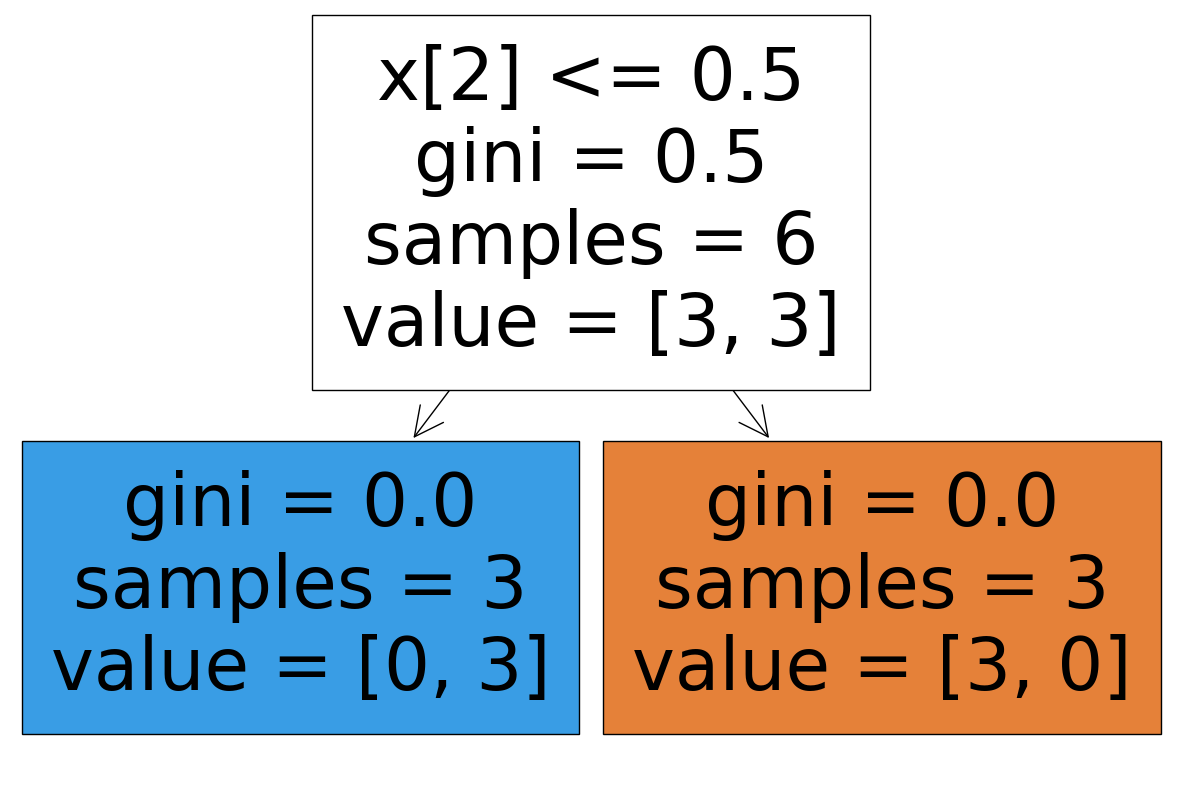

In [ ]:
model, acc, y_pred = decision_tree(dx_train, dy_train, dx_test, dy_test,'gini',None)
print('Accuracy of Model :', acc)

Accuracy of Model : 0.5


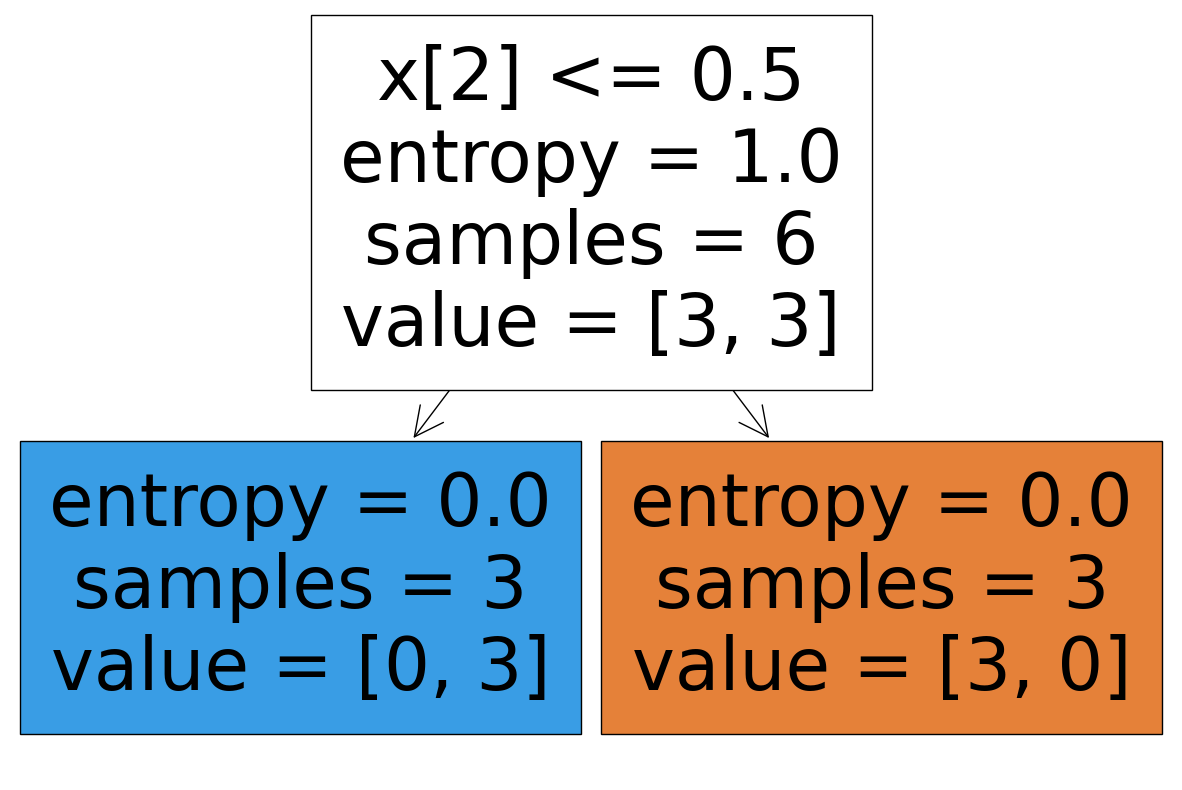

In [ ]:
model, acc, y_pred = decision_tree(dx_train, dy_train, dx_test, dy_test,'entropy',None)
print('Accuracy of Model :', acc)

In [ ]:
model.predict([[0,0,1]]) #Correctly classified

C:\Users\Pakistan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Not selected'], dtype=object)

In [ ]:
model.predict([[0,1,1]]) #incorrectly classified

C:\Users\Pakistan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Not selected'], dtype=object)

In [ ]:
df

,Player,Local Season Average,Foreign Season Performance,Fitness Test,Decision
0,P1,40+,Good,Acceptable fitness,Selected
1,P2,40+,Poor,Acceptable fitness,Not selected
2,P3,60+,Good,Acceptable fitness,Selected
3,P4,60+,Poor,Acceptable fitness,Selected
4,P5,40+,Good,Needs more fitness,Not selected
5,P6,40+,Poor,Needs more fitness,Not selected
6,P7,60+,Good,Needs more fitness,Not selected
7,P8,60+,Poor,Needs more fitness,Not selected


## taking full data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth = 2)

In [ ]:
tree_model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
x_in = np.array([0,0,1])

In [ ]:
y_pred = tree_model.predict([x_in])

C:\Users\Pakistan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred

array(['Not selected'], dtype=object)

# Display the decision tree
 

In [ ]:

from sklearn import tree

[Text(0.6, 0.875, 'x[2] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

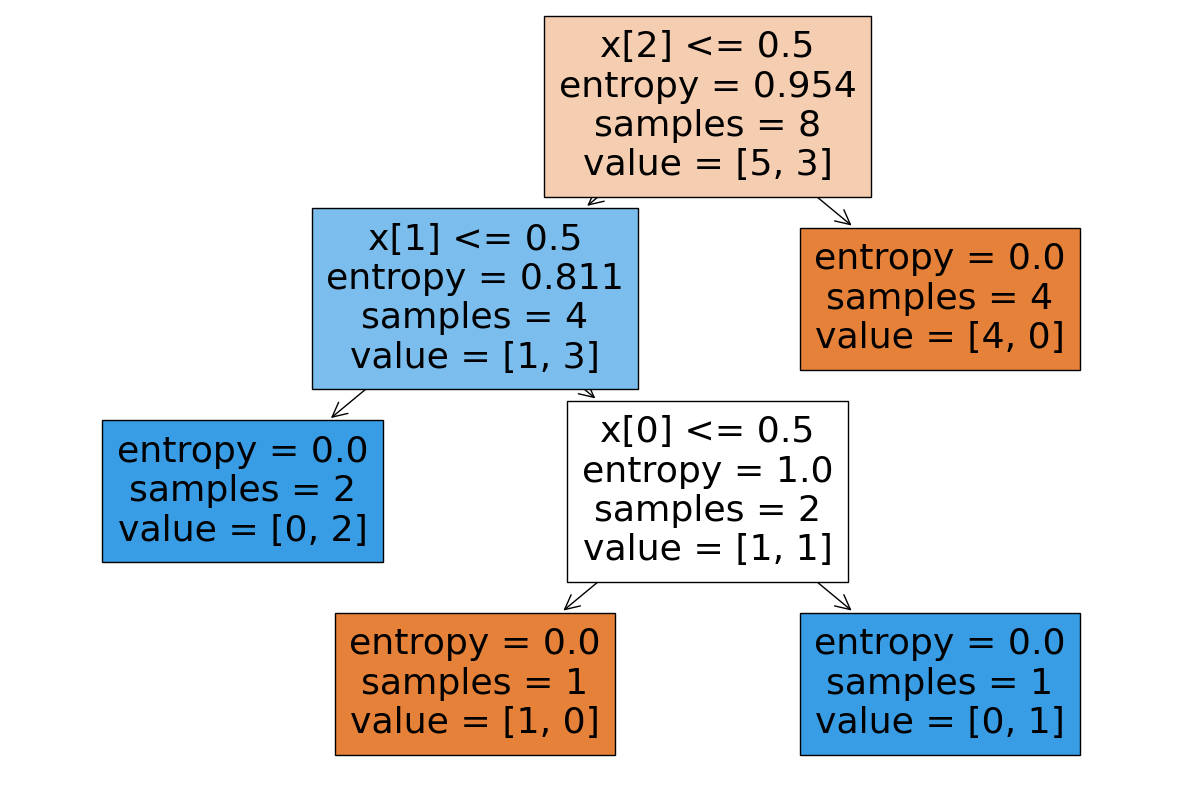

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(tree_model, filled=True)

In [ ]:
df

,Player,Local Season Average,Foreign Season Performance,Fitness Test,Decision
0,P1,40+,Good,Acceptable fitness,Selected
1,P2,40+,Poor,Acceptable fitness,Not selected
2,P3,60+,Good,Acceptable fitness,Selected
3,P4,60+,Poor,Acceptable fitness,Selected
4,P5,40+,Good,Needs more fitness,Not selected
5,P6,40+,Poor,Needs more fitness,Not selected
6,P7,60+,Good,Needs more fitness,Not selected
7,P8,60+,Poor,Needs more fitness,Not selected


In [ ]:
tree_model.predict([[1,1,1]])

C:\Users\Pakistan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Not selected'], dtype=object)